In [186]:
from datashield import DSSession, DSLoginBuilder, DSError

url = 'https://opal-demo.obiba.org'
builder = DSLoginBuilder().add('server1', url, 'dsuser', 'P@ssw0rd').add('server2', url, 'dsuser', 'P@ssw0rd')
logins = builder.build()

session = DSSession(logins)
session.open()

In [187]:
session.profiles()

{'server1': {'available': ['default',
   'exposome',
   'geo',
   'mediation',
   'mtl',
   'omics',
   'survival'],
  'current': 'default'},
 'server2': {'available': ['default',
   'exposome',
   'geo',
   'mediation',
   'mtl',
   'omics',
   'survival'],
  'current': 'default'}}

In [188]:
session.packages()

{'server1': [{'pkg': 'dsBase', 'version': '6.3.0'},
  {'pkg': 'resourcer', 'version': '1.4.0'}],
 'server2': [{'pkg': 'dsBase', 'version': '6.3.0'},
  {'pkg': 'resourcer', 'version': '1.4.0'}]}

In [189]:
session.methods(type='aggregate')

{'server1': [{'name': 'NROW',
   'class': 'func',
   'value': 'base::NROW',
   'pkg': 'dsBase',
   'version': '6.3.0'},
  {'name': 'asFactorDS1',
   'class': 'func',
   'value': 'dsBase::asFactorDS1',
   'pkg': 'dsBase',
   'version': '6.3.0'},
  {'name': 'asListDS',
   'class': 'func',
   'value': 'dsBase::asListDS',
   'pkg': 'dsBase',
   'version': '6.3.0'},
  {'name': 'aucDS',
   'class': 'func',
   'value': 'dsBase::aucDS',
   'pkg': 'dsBase',
   'version': '6.3.0'},
  {'name': 'boxPlotGGDS',
   'class': 'func',
   'value': 'dsBase::boxPlotGGDS',
   'pkg': 'dsBase',
   'version': '6.3.0'},
  {'name': 'checkNegValueDS',
   'class': 'func',
   'value': 'dsBase::checkNegValueDS',
   'pkg': 'dsBase',
   'version': '6.3.0'},
  {'name': 'classDS',
   'class': 'func',
   'value': 'dsBase::classDS',
   'pkg': 'dsBase',
   'version': '6.3.0'},
  {'name': 'colnamesDS',
   'class': 'func',
   'value': 'dsBase::colnamesDS',
   'pkg': 'dsBase',
   'version': '6.3.0'},
  {'name': 'corDS',
   'c

In [190]:
session.tables()

{'server1': ['CNSIM.CNSIM1',
  'CNSIM.CNSIM2',
  'CNSIM.CNSIM3',
  'DASIM.DASIM1',
  'DASIM.DASIM2',
  'DASIM.DASIM3',
  'DISCORDANT.DISCORDANT_STUDY1',
  'DISCORDANT.DISCORDANT_STUDY2',
  'DISCORDANT.DISCORDANT_STUDY3',
  'GREENSPACE.Cohort1_exposome',
  'GREENSPACE.Cohort2_exposome',
  'GREENSPACE.Cohort3_exposome',
  'MEDIATION.UPBdata1',
  'MEDIATION.UPBdata2',
  'MEDIATION.UPBdata3',
  'SURVIVAL.EXPAND_WITH_MISSING1',
  'SURVIVAL.EXPAND_WITH_MISSING2',
  'SURVIVAL.EXPAND_WITH_MISSING3',
  'TESTING.TESTING1',
  'TESTING.TESTING2',
  'TESTING.TESTING3',
  'TITANIC_NEWCOMERS_WORKSHOP.titanic_server_1',
  'TITANIC_NEWCOMERS_WORKSHOP.titanic_server_2',
  'serverDataKey.myKey'],
 'server2': ['CNSIM.CNSIM1',
  'CNSIM.CNSIM2',
  'CNSIM.CNSIM3',
  'DASIM.DASIM1',
  'DASIM.DASIM2',
  'DASIM.DASIM3',
  'DISCORDANT.DISCORDANT_STUDY1',
  'DISCORDANT.DISCORDANT_STUDY2',
  'DISCORDANT.DISCORDANT_STUDY3',
  'GREENSPACE.Cohort1_exposome',
  'GREENSPACE.Cohort2_exposome',
  'GREENSPACE.Cohort3_expo

In [ ]:
session.resources()

In [191]:
session.assign_resource('client', resources = { 'server1': 'RSRC.CNSIM1', 'server2': 'RSRC.CNSIM2' }, asynchronous = False)
session.ls()

{'server1': ['client'], 'server2': ['client']}

In [192]:
session.aggregate('classDS("client")', asynchronous = False)

{'server1': ['SQLResourceClient', 'ResourceClient', 'R6'],
 'server2': ['TidyFileResourceClient',
  'FileResourceClient',
  'ResourceClient',
  'R6']}

In [193]:
session.assign_expr('df', 'as.resource.data.frame(client, strict = TRUE)', asynchronous = False)
session.ls()

{'server1': ['client', 'df'], 'server2': ['client', 'df']}

In [194]:
session.aggregate('classDS("df")', asynchronous = False)

{'server1': 'data.frame', 'server2': 'data.frame'}

In [195]:
session.aggregate('colnamesDS("df")', asynchronous = False)

{'server1': ['id',
  'LAB_TSC',
  'LAB_TRIG',
  'LAB_HDL',
  'LAB_GLUC_ADJUSTED',
  'PM_BMI_CONTINUOUS',
  'DIS_CVA',
  'MEDI_LPD',
  'DIS_DIAB',
  'DIS_AMI',
  'GENDER',
  'PM_BMI_CATEGORICAL'],
 'server2': ['entity_id',
  'DIS_AMI',
  'DIS_CVA',
  'DIS_DIAB',
  'GENDER',
  'LAB_GLUC_ADJUSTED',
  'LAB_HDL',
  'LAB_TRIG',
  'LAB_TSC',
  'MEDI_LPD',
  'PM_BMI_CATEGORICAL',
  'PM_BMI_CONTINUOUS']}

In [196]:
session.aggregate('meanDS(df$LAB_GLUC_ADJUSTED)')

{'server1': {'EstimatedMean': 6.12409001097695,
  'Nmissing': 341,
  'Nvalid': 1822,
  'Ntotal': 2163,
  'ValidityMessage': 'VALID ANALYSIS'},
 'server2': {'EstimatedMean': 6.10151761517615,
  'Nmissing': 505,
  'Nvalid': 2583,
  'Ntotal': 3088,
  'ValidityMessage': 'VALID ANALYSIS'}}

In [197]:
session.assign_table('df2', tables = { 'server1': 'CNSIM.CNSIM1', 'server2': 'CNSIM.CNSIM2' })
session.ls()

{'server1': ['client', 'df', 'df2'], 'server2': ['client', 'df', 'df2']}

In [207]:
data = session.aggregate('heatmapPlotDS(df2$LAB_TSC, df2$LAB_HDL, 3, 0.25, 1)')
data['server1']

[[5.09788752665284,
  5.88888992893016,
  5.28327345759916,
  5.50331410884942,
  6.74785595743463,
  6.52007687349514,
  5.90436679430862,
  6.07259359190056,
  5.73815871828778,
  5.94877866887289,
  6.3370461177151,
  4.843865062289,
  4.55787950638269,
  4.69784420197919,
  5.58439942528874,
  7.52439085511905,
  4.8771739682122,
  6.07663103504277,
  5.80915042687158,
  5.01040959190502,
  5.92960081394741,
  5.85894555895879,
  5.83472090010555,
  5.94541413292105,
  5.0965417122721,
  4.63257220451352,
  7.09877705721143,
  5.62982066063857,
  5.36200359887219,
  5.36402232044329,
  7.67949596249882,
  6.9490552073546,
  5.5978575690961,
  5.67255026722692,
  4.86640745316632,
  6.44403836098358,
  3.81061607147927,
  6.18429618550161,
  6.65465831156869,
  6.73675298879356,
  7.15092736446493,
  7.15092736446493,
  5.44308891531151,
  4.99930662326396,
  7.15866579715416,
  5.2052162235165,
  4.19888352032148,
  5.97939594603463,
  6.87268024124785,
  5.46226677023699,
  5.6994

In [208]:
x = data['server1'][0]
y = data['server1'][1]
xmin = min(x)
xmax = max(x)
ymin = min(y)
ymax = max(y)
xrange = xmax - xmin
yrange = ymax - ymin
numints = 20
xinterval = xrange / numints
yinterval = yrange / numints
import numpy as np
xcuts = np.arange(xmin, xmax, xinterval)
#xcuts[numints] = xcuts[numints] * 1.001
ycuts = np.arange(ymin, ymax, yinterval)
#ycuts[numints] = ycuts[numints] * 1.001
xmids = np.arange(xmin + xinterval / 2, xmax - xinterval / 2, xinterval)
ymids = np.arange(ymin + yinterval / 2, ymax - yinterval / 2, yinterval)
# TODO grid density


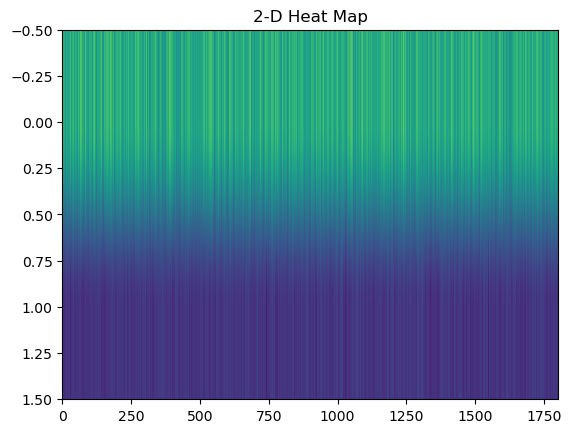

In [209]:
import matplotlib.pyplot as plt
plt.imshow(data['server1'], aspect='auto')
plt.title( "2-D Heat Map" )
plt.show()

In [210]:
data = session.aggregate('histogramDS2(df2$LAB_GLUC_ADJUSTED, num.breaks=20, min=0, max=20, method.indicator=1, k=3, noise=0.25)')
data['server1']

{'type': 'list',
 'attributes': {'names': {'type': 'character',
   'attributes': {},
   'value': ['histobject', 'invalidcells']}},
 'value': [{'type': 'list',
   'attributes': {'names': {'type': 'character',
     'attributes': {},
     'value': ['breaks', 'counts', 'density', 'mids', 'xname', 'equidist']},
    'class': {'type': 'character', 'attributes': {}, 'value': ['histogram']}},
   'value': [{'type': 'double',
     'attributes': {},
     'value': [0,
      1,
      2,
      3,
      4,
      5,
      6,
      7,
      8,
      9,
      10,
      11,
      12,
      13,
      14,
      15,
      16,
      17,
      18,
      19,
      20]},
    {'type': 'double',
     'attributes': {},
     'value': [0,
      0,
      9,
      60,
      277,
      521,
      558,
      281,
      80,
      9,
      4,
      11,
      5,
      5,
      0,
      0,
      0,
      0,
      0,
      0]},
    {'type': 'double',
     'attributes': {},
     'value': [0,
      0,
      0.00493963,
      0.

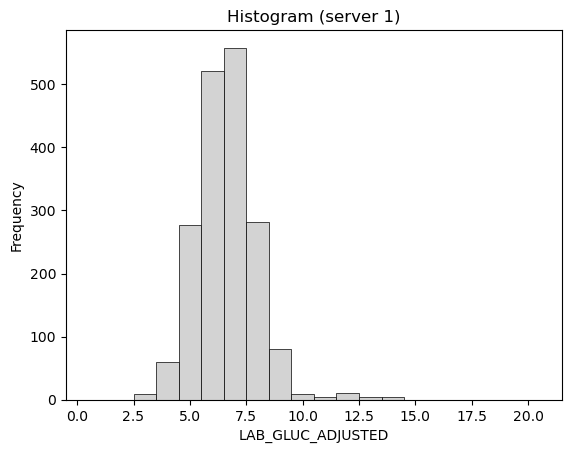

In [211]:
breaks = data['server1']['value'][0]['value'][0]['value']
counts = data['server1']['value'][0]['value'][1]['value']

plt.bar(breaks[1:], counts, width=1, edgecolor='black', linewidth=0.5, color='lightgrey')
plt.xlabel('LAB_GLUC_ADJUSTED')
plt.ylabel('Frequency')
plt.title('Histogram (server 1)')
plt.show()

In [93]:
try:
  session.aggregate('heatmapPlotDS(df2$LAB_TSC, df2$LAB_HDL, 3, 0.25, "xxx")')
except DSError as e:
  print(session.get_errors())

{'server1': OpalDSError('Command 24dd829e-9e18-4c18-b0ac-0137a2c109cc-6 failed on server1: Error while evaluating \'dsBase::heatmapPlotDS(df2$LAB_TSC, df2$LAB_HDL, 3, 0.25, "xxx")\' -> Error in dsBase::heatmapPlotDS(df2$LAB_TSC, df2$LAB_HDL, 3, 0.25, "xxx") : \n  object \'x.new\' not found\n'), 'server2': OpalDSError('Command 65a2060f-59e1-4924-b67e-fcb96ba35cd7-6 failed on server2: Error while evaluating \'dsBase::heatmapPlotDS(df2$LAB_TSC, df2$LAB_HDL, 3, 0.25, "xxx")\' -> Error in dsBase::heatmapPlotDS(df2$LAB_TSC, df2$LAB_HDL, 3, 0.25, "xxx") : \n  object \'x.new\' not found\n')}


In [185]:
session.close()